In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
# read in wci dataset
wci = pd.read_csv('world_crime_index.csv')
wci

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29
...,...,...,...,...
448,449,"Quebec City, Canada",15.14,84.86
449,450,"Taipei, Taiwan",15.05,84.95
450,451,"San Sebastian, Spain",14.86,85.14
451,452,"Doha, Qatar",13.96,86.04


In [93]:
# check for null values
wci.isnull().sum()

Rank            0
City            0
Crime Index     0
Safety Index    0
dtype: int64

In [94]:
# split city into city and country columns, drop state/province labels
wci = pd.concat([wci.drop('City',1), wci['City'].str.split(', ', expand=True)], axis=1)
wci[wci[1].str.len() < 4][1] = wci[2]
wci.rename(columns = {0:'City',1:'Country'}, inplace = True)
wci = wci[['City','Country','Crime Index','Safety Index']]
wci

/var/folders/2t/z1hgylj168g3bqmgn3bz7wrw0000gq/T/ipykernel_27449/3737165445.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  wci = pd.concat([wci.drop('City',1), wci['City'].str.split(', ', expand=True)], axis=1)
/var/folders/2t/z1hgylj168g3bqmgn3bz7wrw0000gq/T/ipykernel_27449/3737165445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wci[wci[1].str.len() < 4][1] = wci[2]


,City,Country,Crime Index,Safety Index
0,Caracas,Venezuela,83.98,16.02
1,Pretoria,South Africa,81.98,18.02
2,Celaya,Mexico,81.80,18.20
3,San Pedro Sula,Honduras,80.87,19.13
4,Port Moresby,Papua New Guinea,80.71,19.29
...,...,...,...,...
448,Quebec City,Canada,15.14,84.86
449,Taipei,Taiwan,15.05,84.95
450,San Sebastian,Spain,14.86,85.14
451,Doha,Qatar,13.96,86.04


In [145]:
# col_v2 is the most up to date col dataset, as of 12/3/22
# col is older dataset from mid 2022, so we will use v2
# col = pd.read_csv('cost-of-living.csv')
col = pd.read_csv('cost-of-living_v2.csv')
col

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,0.98,NaN,1.80,0.62,0.41,...,103.14,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0
4954,Iqaluit,Canada,29.65,74.27,13.71,6.67,8.89,3.71,3.52,4.08,...,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0


In [146]:
# check for nulls
col.isnull().sum()
# run through nulls > 1000 to see which we can drop
# col.isnull().sum() > 1000

city               0
country            0
x1               428
x2               451
x3               334
x4               496
x5               440
x6               344
x7               445
x8               316
x9               378
x10              413
x11              343
x12              507
x13              478
x14              558
x15              566
x16              372
x17              381
x18              441
x19              469
x20              437
x21              433
x22              501
x23              388
x24              462
x25              721
x26              655
x27              490
x28             1506
x29             2166
x30              873
x31             1022
x32             1396
x33              588
x34             1058
x35              995
x36              488
x37             1201
x38              349
x39             1375
x40             2400
x41              475
x42             1132
x43             1681
x44              479
x45              617
x46          

In [148]:
# drop 28-32,34,35,37,39-43
# col.drop(['x28','x29','x30','x31','x32','x34','x35','x37','x39','x40','x41','x42','x43'],1)
# too many nan values, drop all nan instead
col = col.dropna()
# drop all rows with data_quality 0, as Numbeo determined more data needed
col = col[col['data_quality'] == 1]
col

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,Charlottetown,Canada,18.53,64.85,7.41,4.45,4.82,2.89,1.72,1.58,...,83.38,925.51,789.85,1352.60,1227.53,2393.30,1563.62,1704.64,4.14,1
4205,Haugesund,Norway,15.41,82.20,12.33,8.79,8.73,4.42,3.42,2.93,...,123.28,719.26,565.13,1335.73,1104.54,2527.67,2292.82,3383.13,2.57,1
4322,Lagos,Portugal,8.43,63.22,7.38,2.63,2.63,1.80,1.79,1.44,...,61.12,882.51,716.55,1650.87,1219.15,3517.33,3450.68,923.29,3.33,1
4404,Porto Calvo,Brazil,4.79,25.87,5.75,1.92,2.30,1.74,1.06,0.71,...,46.94,306.55,248.27,557.54,457.43,1264.51,1101.66,395.29,8.17,1


In [236]:
# normalize col and average all features to create rough cost of living index
col_norm = col.drop(['city','country'],axis=1)
col_norm = (col_norm-col_norm.min())/(col_norm.max()-col_norm.min())
col['COL Index'] = col_norm.mean(axis=1)*100
col

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x48,x49,x50,x51,x52,x53,x54,x55,data_quality,COL Index
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1,30.965040
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1,21.377123
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1,15.545037
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1,10.590644
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1,9.156297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,Charlottetown,Canada,18.53,64.85,7.41,4.45,4.82,2.89,1.72,1.58,...,925.51,789.85,1352.60,1227.53,2393.30,1563.62,1704.64,4.14,1,29.695677
4205,Haugesund,Norway,15.41,82.20,12.33,8.79,8.73,4.42,3.42,2.93,...,719.26,565.13,1335.73,1104.54,2527.67,2292.82,3383.13,2.57,1,34.113829
4322,Lagos,Portugal,8.43,63.22,7.38,2.63,2.63,1.80,1.79,1.44,...,882.51,716.55,1650.87,1219.15,3517.33,3450.68,923.29,3.33,1,19.508021
4404,Porto Calvo,Brazil,4.79,25.87,5.75,1.92,2.30,1.74,1.06,0.71,...,306.55,248.27,557.54,457.43,1264.51,1101.66,395.29,8.17,1,13.160589


Text(0.5, 0, 'Cost of Meal (USD)')

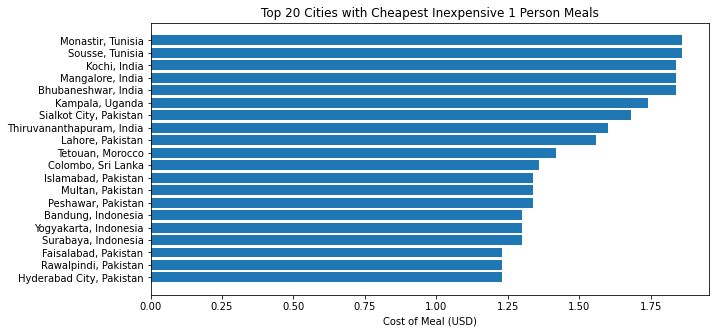

In [188]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x1')['city'][:20]+', '+col.sort_values('x1')['country'][:20],col['x1'].sort_values()[:20])
plt.title('Top 20 Cities with Cheapest Inexpensive 1 Person Meals')
plt.xlabel('Cost of Meal (USD)')

Text(0.5, 0, 'Cost of Meal (USD)')

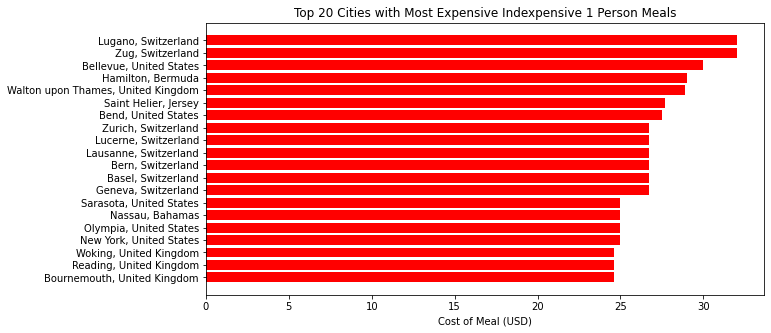

In [191]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x1')['city'][-20:]+', '+col.sort_values('x1')['country'][-20:],col['x1'].sort_values()[-20:],color='red')
plt.title('Top 20 Cities with Most Expensive Indexpensive 1 Person Meals')
plt.xlabel('Cost of Meal (USD)')

Text(0.5, 0, 'Cost of Meal (USD)')

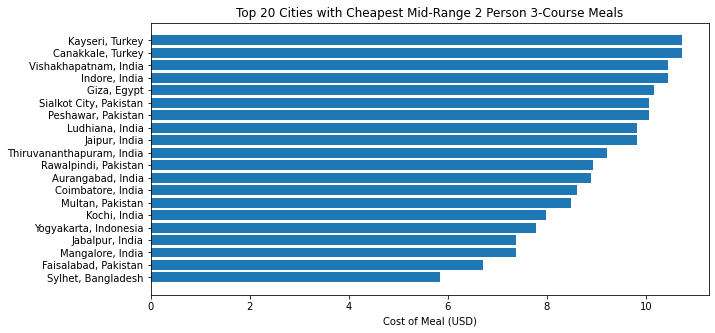

In [174]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x2')['city'][:20]+', '+col.sort_values('x2')['country'][:20],col['x2'].sort_values()[:20])
plt.title('Top 20 Cities with Cheapest Mid-Range 2 Person 3-Course Meals')
plt.xlabel('Cost of Meal (USD)')

Text(0.5, 0, 'Cost of Meal (USD)')

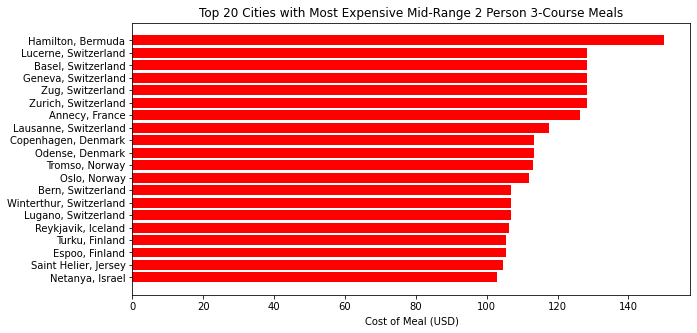

In [193]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x2')['city'][-20:]+', '+col.sort_values('x2')['country'][-20:],col['x2'].sort_values()[-20:],color='red')
plt.title('Top 20 Cities with Most Expensive Mid-Range 2 Person 3-Course Meals')
plt.xlabel('Cost of Meal (USD)')

Text(0.5, 0, 'Cost of Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)')

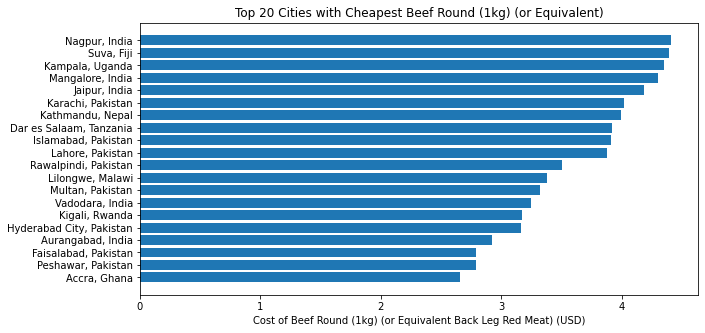

In [177]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x15')['city'][:20]+', '+col.sort_values('x15')['country'][:20],col['x15'].sort_values()[:20])
plt.title('Top 20 Cities with Cheapest Beef Round (1kg) (or Equivalent)')
plt.xlabel('Cost of Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)')

Text(0.5, 0, 'Cost of Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)')

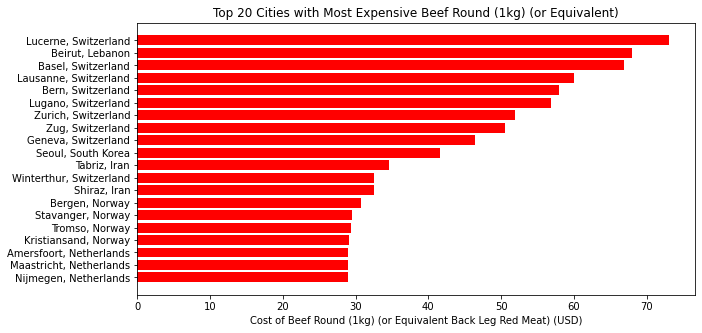

In [194]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x15')['city'][-20:]+', '+col.sort_values('x15')['country'][-20:],col['x15'].sort_values()[-20:],color='red')
plt.title('Top 20 Cities with Most Expensive Beef Round (1kg) (or Equivalent)')
plt.xlabel('Cost of Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)')

Text(0.5, 0, 'Avg. Cost of Apartment in City Center (USD)')

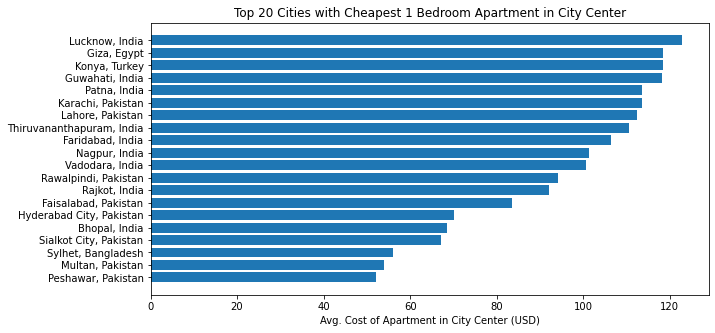

In [179]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x48')['city'][:20]+', '+col.sort_values('x48')['country'][:20],col['x48'].sort_values()[:20])
plt.title('Top 20 Cities with Cheapest 1 Bedroom Apartment in City Center')
plt.xlabel('Avg. Cost of Apartment in City Center (USD)')

Text(0.5, 0, 'Avg. Cost of Apartment in City Center (USD)')

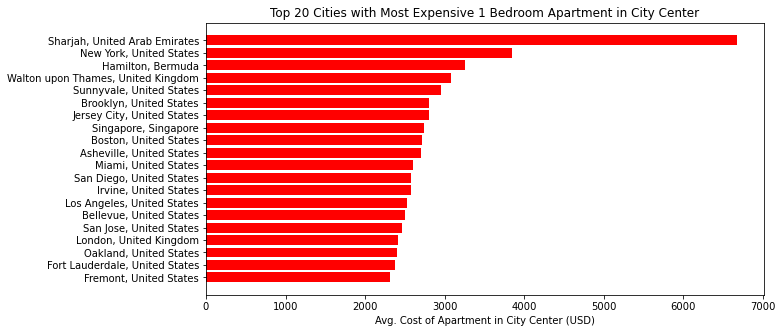

In [195]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('x48')['city'][-20:]+', '+col.sort_values('x48')['country'][-20:],col['x48'].sort_values()[-20:],color='red')
plt.title('Top 20 Cities with Most Expensive 1 Bedroom Apartment in City Center')
plt.xlabel('Avg. Cost of Apartment in City Center (USD)')

Text(0.5, 0, 'Avg. Cost of Apartment in City Center (USD)')

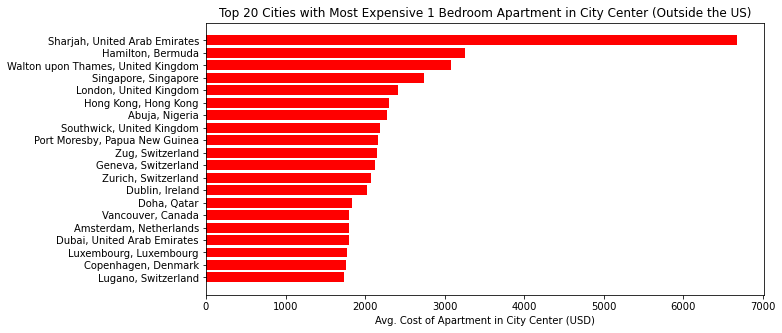

In [201]:
plt.figure(figsize=(10,5))
plt.barh(col[col['country']!='United States'].sort_values('x48')['city'][-20:]+', '+col[col['country']!='United States'].sort_values('x48')['country'][-20:],col[col['country']!='United States']['x48'].sort_values()[-20:],color='red')
plt.title('Top 20 Cities with Most Expensive 1 Bedroom Apartment in City Center (Outside the US)')
plt.xlabel('Avg. Cost of Apartment in City Center (USD)')

Text(0.5, 0, 'Cost of Living Index')

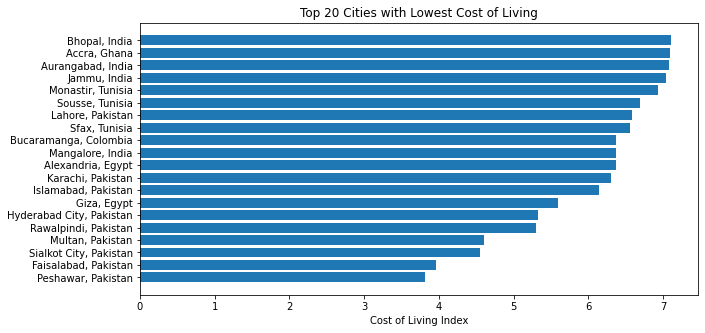

In [237]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('COL Index')['city'][:20]+', '+col.sort_values('COL Index')['country'][:20],col['COL Index'].sort_values()[:20])
plt.title('Top 20 Cities with Lowest Cost of Living')
plt.xlabel('Cost of Living Index')

Text(0.5, 0, 'Cost of Living Index')

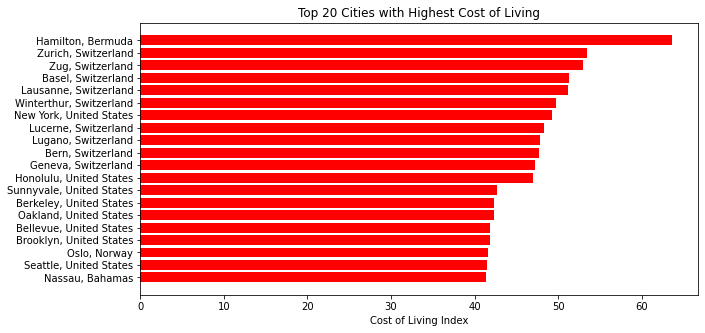

In [238]:
plt.figure(figsize=(10,5))
plt.barh(col.sort_values('COL Index')['city'][-20:]+', '+col.sort_values('COL Index')['country'][-20:],col['COL Index'].sort_values()[-20:],color='red')
plt.title('Top 20 Cities with Highest Cost of Living')
plt.xlabel('Cost of Living Index')

In [239]:
# create merged df of cities with CI/SI and CoL statistics
wci_col = pd.merge(wci,col,left_on=['City','Country'],right_on=['city','country']).drop(['city','country'],1)
wci_col

/var/folders/2t/z1hgylj168g3bqmgn3bz7wrw0000gq/T/ipykernel_27449/865831329.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  wci_col = pd.merge(wci,col,left_on=['City','Country'],right_on=['city','country']).drop(['city','country'],1)


,City,Country,Crime Index,Safety Index,x1,x2,x3,x4,x5,x6,...,x48,x49,x50,x51,x52,x53,x54,x55,data_quality,COL Index
0,Caracas,Venezuela,83.98,16.02,10.00,50.00,10.00,1.50,2.25,1.74,...,383.33,322.22,831.25,587.50,805.57,1140.96,185.12,27.00,1,16.605662
1,Pretoria,South Africa,81.98,18.02,6.84,34.22,4.56,1.71,2.00,1.65,...,299.65,338.21,707.13,700.95,439.11,617.62,1382.39,8.63,1,13.536040
2,Port Moresby,Papua New Guinea,80.71,19.29,9.84,48.61,8.53,3.13,5.12,3.33,...,2162.16,519.20,3366.52,960.17,9246.09,20059.54,401.85,14.17,1,29.552043
3,Durban,South Africa,80.60,19.40,8.55,34.22,3.99,1.82,2.28,1.73,...,351.67,301.36,678.97,634.90,665.31,850.98,1079.61,8.52,1,12.462434
4,Johannesburg,South Africa,80.55,19.45,8.55,34.22,4.28,2.28,2.28,1.82,...,396.60,371.40,756.77,736.50,735.61,670.67,1502.75,9.12,1,14.507349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Sharjah,United Arab Emirates,15.69,84.31,5.45,19.06,6.81,6.81,6.81,4.63,...,6678.30,4996.72,1236.98,927.94,2212.09,1769.67,1681.97,4.44,1,23.329517
317,Quebec City,Canada,15.14,84.86,14.88,59.29,9.63,5.19,5.19,3.48,...,721.93,588.10,1242.85,929.81,7736.10,1752.82,3012.07,5.06,1,25.800779
318,Taipei,Taiwan,15.05,84.95,5.89,39.28,4.91,1.96,2.62,3.03,...,680.15,441.34,1474.67,1007.15,14799.79,8216.94,1876.87,1.67,1,23.419744
319,Doha,Qatar,13.96,86.04,8.24,54.93,6.87,12.36,13.05,5.44,...,1835.36,1177.07,3495.54,2288.14,4995.19,4239.91,3342.40,3.94,1,28.392209


In [222]:
wci_col.isnull().sum()

City            0
Country         0
Crime Index     0
Safety Index    0
x1              0
               ..
x53             0
x54             0
x55             0
data_quality    0
COL Index       0
Length: 61, dtype: int64

In [223]:
# first drop x43 as it is not important to us, then drop remaining na rows
wci_col = wci_col.drop(['x43'],1).dropna()
wci_col

/var/folders/2t/z1hgylj168g3bqmgn3bz7wrw0000gq/T/ipykernel_27449/2058616682.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  wci_col = wci_col.drop(['x43'],1).dropna()


,City,Country,Crime Index,Safety Index,x1,x2,x3,x4,x5,x6,...,x48,x49,x50,x51,x52,x53,x54,x55,data_quality,COL Index
0,Caracas,Venezuela,83.98,16.02,10.00,50.00,10.00,1.50,2.25,1.74,...,383.33,322.22,831.25,587.50,805.57,1140.96,185.12,27.00,1,0.165187
1,Pretoria,South Africa,81.98,18.02,6.84,34.22,4.56,1.71,2.00,1.65,...,299.65,338.21,707.13,700.95,439.11,617.62,1382.39,8.63,1,0.134866
2,Port Moresby,Papua New Guinea,80.71,19.29,9.84,48.61,8.53,3.13,5.12,3.33,...,2162.16,519.20,3366.52,960.17,9246.09,20059.54,401.85,14.17,1,0.293066
3,Durban,South Africa,80.60,19.40,8.55,34.22,3.99,1.82,2.28,1.73,...,351.67,301.36,678.97,634.90,665.31,850.98,1079.61,8.52,1,0.124261
4,Johannesburg,South Africa,80.55,19.45,8.55,34.22,4.28,2.28,2.28,1.82,...,396.60,371.40,756.77,736.50,735.61,670.67,1502.75,9.12,1,0.144460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Sharjah,United Arab Emirates,15.69,84.31,5.45,19.06,6.81,6.81,6.81,4.63,...,6678.30,4996.72,1236.98,927.94,2212.09,1769.67,1681.97,4.44,1,0.231602
317,Quebec City,Canada,15.14,84.86,14.88,59.29,9.63,5.19,5.19,3.48,...,721.93,588.10,1242.85,929.81,7736.10,1752.82,3012.07,5.06,1,0.256013
318,Taipei,Taiwan,15.05,84.95,5.89,39.28,4.91,1.96,2.62,3.03,...,680.15,441.34,1474.67,1007.15,14799.79,8216.94,1876.87,1.67,1,0.232494
319,Doha,Qatar,13.96,86.04,8.24,54.93,6.87,12.36,13.05,5.44,...,1835.36,1177.07,3495.54,2288.14,4995.19,4239.91,3342.40,3.94,1,0.281610


Text(0.5, 0, 'Crime Index')

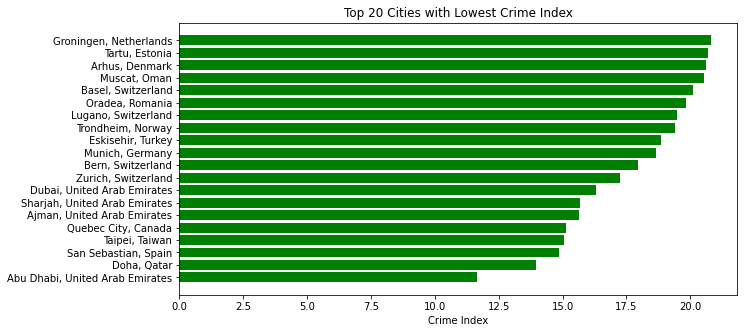

In [206]:
plt.figure(figsize=(10,5))
plt.barh(wci.sort_values('Crime Index')['City'][:20]+', '+wci.sort_values('Crime Index')['Country'][:20],wci['Crime Index'].sort_values()[:20],color='green')
plt.title('Top 20 Cities with Lowest Crime Index')
plt.xlabel('Crime Index')

Text(0.5, 0, 'Crime Index')

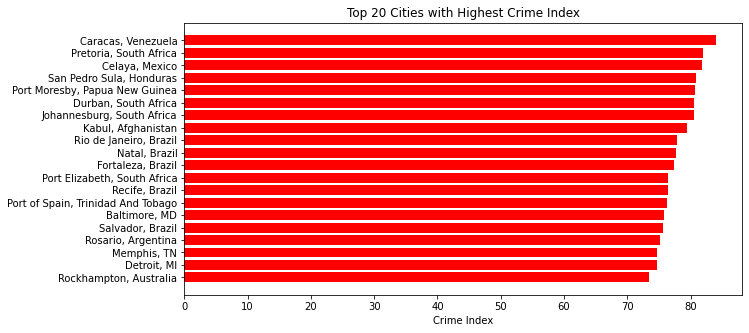

In [207]:
plt.figure(figsize=(10,5))
plt.barh(wci.sort_values('Crime Index')['City'][-20:]+', '+wci.sort_values('Crime Index')['Country'][-20:],wci['Crime Index'].sort_values()[-20:],color='red')
plt.title('Top 20 Cities with Highest Crime Index')
plt.xlabel('Crime Index')

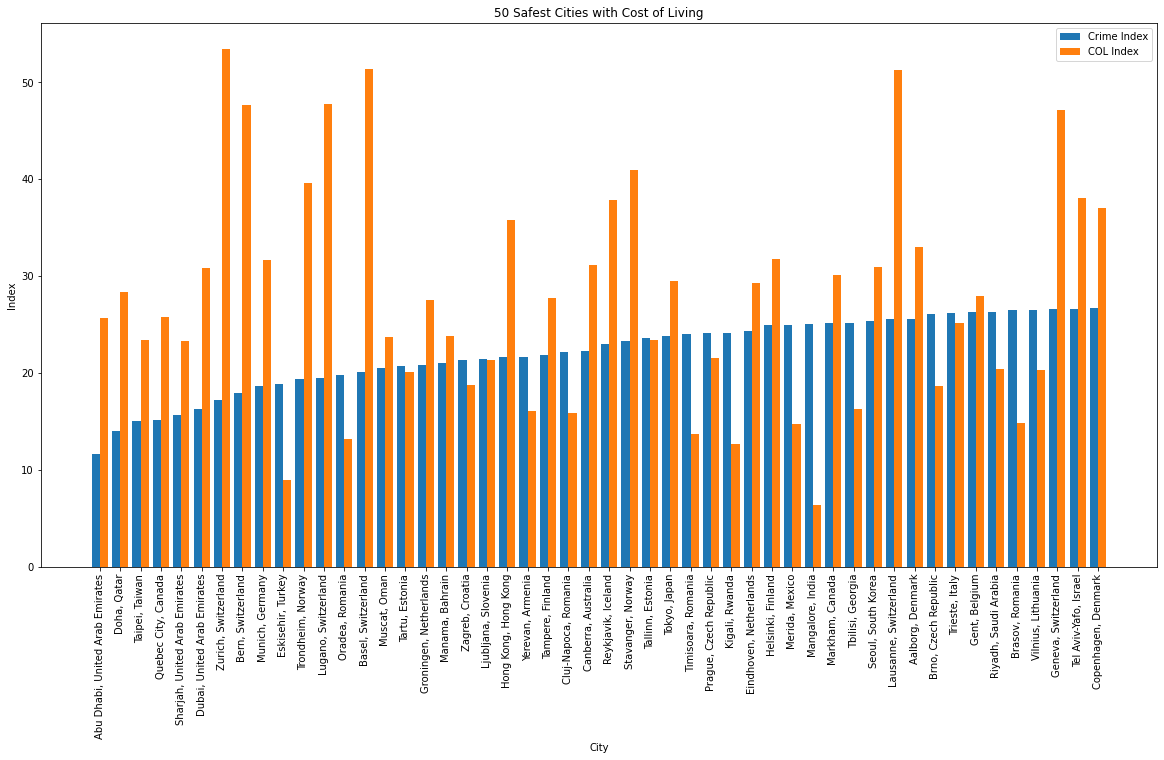

In [248]:
X_axis = np.arange(50)

plt.figure(figsize=(20,10))

plt.bar(X_axis - 0.2, wci_col.sort_values('Crime Index')['Crime Index'][:50], 0.4, label = 'Crime Index')
plt.bar(X_axis + 0.2, wci_col.sort_values('Crime Index')['COL Index'][:50], 0.4, label = 'COL Index')
  
plt.xticks(X_axis, wci_col.sort_values('Crime Index')['City'][:50]+', '+wci_col.sort_values('Crime Index')['Country'][:50], rotation=90)
plt.xlabel("City")
plt.ylabel("Index")
plt.title("50 Safest Cities with Cost of Living")
plt.legend()
plt.show()

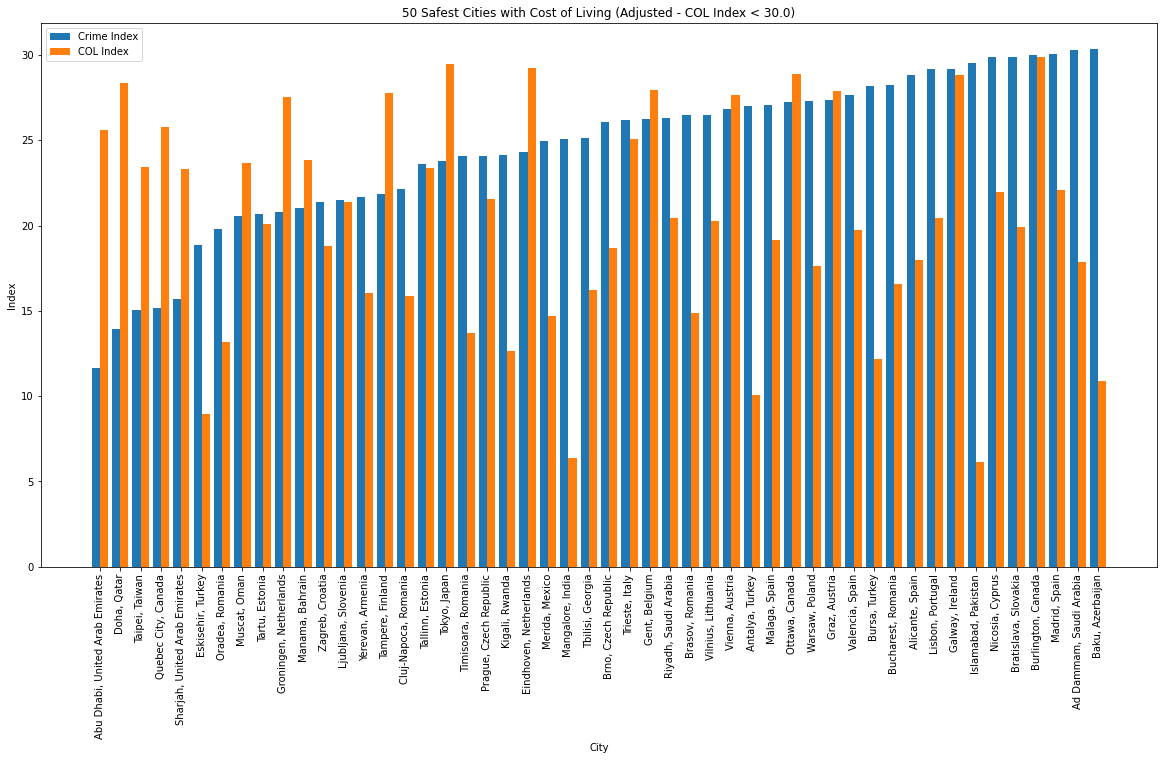

In [250]:
X_axis = np.arange(50)

plt.figure(figsize=(20,10))

plt.bar(X_axis - 0.2, wci_col[wci_col['COL Index'] < 30].sort_values('Crime Index')['Crime Index'][:50], 0.4, label = 'Crime Index')
plt.bar(X_axis + 0.2, wci_col[wci_col['COL Index'] < 30].sort_values('Crime Index')['COL Index'][:50], 0.4, label = 'COL Index')
  
plt.xticks(X_axis, wci_col[wci_col['COL Index'] < 30].sort_values('Crime Index')['City'][:50]+', '+wci_col[wci_col['COL Index'] < 30].sort_values('Crime Index')['Country'][:50], rotation=90)
plt.xlabel("City")
plt.ylabel("Index")
plt.title("50 Safest Cities with Cost of Living (Adjusted - COL Index < 30.0)")
plt.legend()
plt.show()

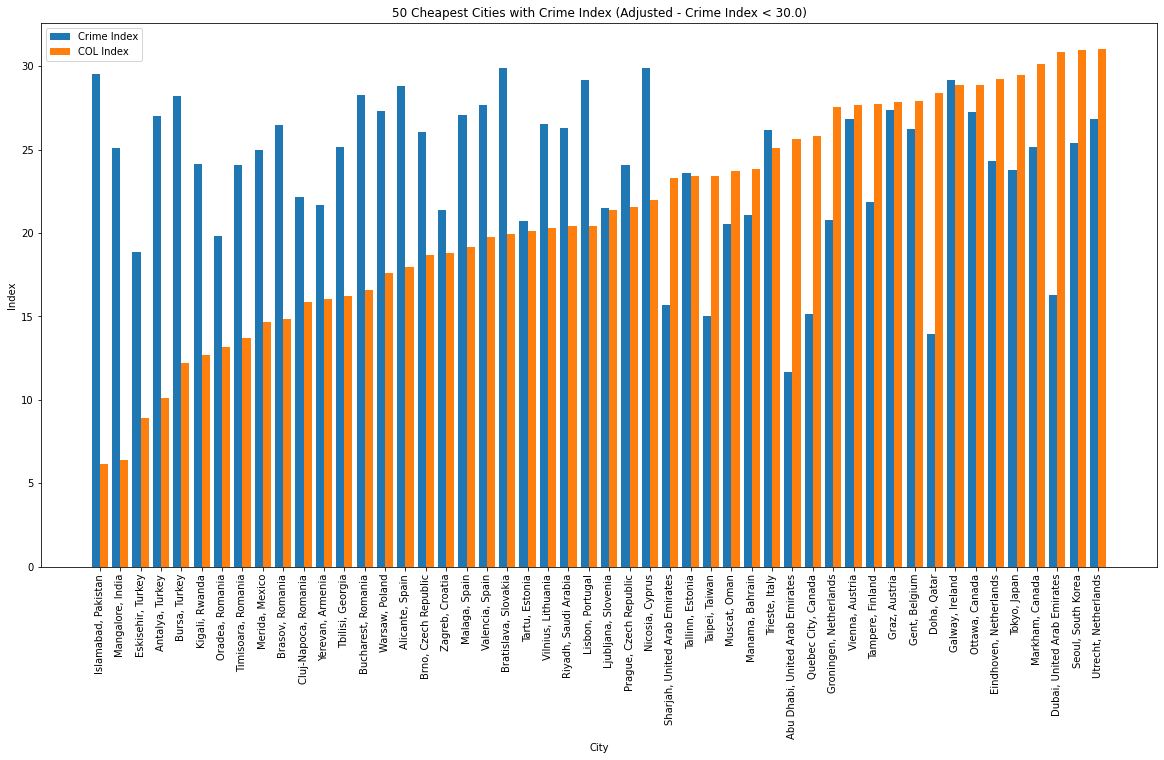

In [254]:
X_axis = np.arange(50)

plt.figure(figsize=(20,10))

plt.bar(X_axis - 0.2, wci_col[wci_col['Crime Index'] < 30].sort_values('COL Index')['Crime Index'][:50], 0.4, label = 'Crime Index')
plt.bar(X_axis + 0.2, wci_col[wci_col['Crime Index'] < 30].sort_values('COL Index')['COL Index'][:50], 0.4, label = 'COL Index')
  
plt.xticks(X_axis, wci_col[wci_col['Crime Index'] < 30].sort_values('COL Index')['City'][:50]+', '+wci_col[wci_col['Crime Index'] < 30].sort_values('COL Index')['Country'][:50], rotation=90)
plt.xlabel("City")
plt.ylabel("Index")
plt.title("50 Cheapest Cities with Crime Index (Adjusted - Crime Index < 30.0)")
plt.legend()
plt.show()